# AMC Ape Army NFT Image Generation

### Requirements
- 69,000 total images generated
- All unique
- Some layers limited in quantity as denoted in layers.csv

_Written by Brandon Boynton for Brad Trimble_

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import hashlib
from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter
from random import *
from IPython.display import display, clear_output
from os.path import exists

In [2]:
layers = pd.read_csv('assets/layers.csv')

In [3]:
backColors = layers[layers.Layer == 1].reset_index(drop=True)
backImages = layers[layers.Layer == 2].reset_index(drop=True)
apes = layers[layers.Layer == 3].reset_index(drop=True)
attributes = layers[layers.Layer == 4].reset_index(drop=True)
weapons = layers[layers.Layer == 5].reset_index(drop=True)

In [4]:
len(backColors)*len(backImages)*len(apes)*len(attributes)*len(weapons)

277992

Not considering limitations, we have a total possible count of 277992 right now

In [5]:
exported = pd.DataFrame(columns=['BackgroundColors','BackgroundImages','Apes','Attributes','Weapons'])

if os.path.exists('output/_metadata.csv'):
    print("Importing metadata")
    exported = pd.read_csv('output/_metadata.csv')

Importing metadata


This will be our exported metadata for the attributes of each image

### Generating a complete image
Let's start with one, hardcoded

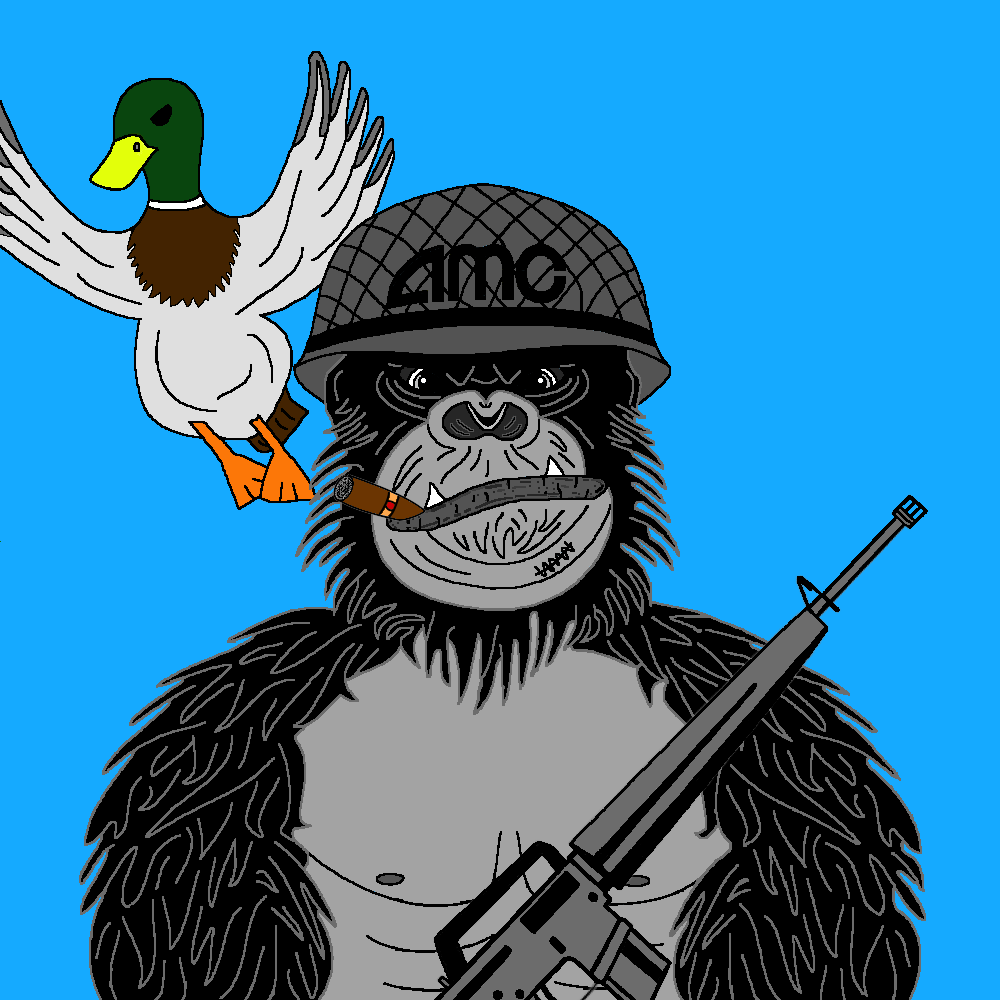

In [6]:
img = Image.open("assets/BackgroundColors/BlueBackground.png")

backImg = Image.open('assets/BackgroundImages/Duck.png')
img.paste(backImg, mask=backImg)

ape = Image.open('assets/Apes/BlackApe.png')
img.paste(ape, mask=ape)

att = Image.open('assets/Attributes/Cigar.png')
img.paste(att, mask=att)

weapon = Image.open('assets/Weapons/AR15.png')
img.paste(weapon, mask=weapon) 

display(img)

Absolutely beautiful

# Generating 69k

In [7]:
def gen_ape(color,back,ape,att,weapon):
    img = Image.open("assets/BackgroundColors/{}.png".format(color))

    backImg = Image.open('assets/BackgroundImages/{}.png'.format(back))
    img.paste(backImg, mask=backImg)

    ape = Image.open('assets/Apes/{}.png'.format(ape))
    img.paste(ape, mask=ape)

    att = Image.open('assets/Attributes/{}.png'.format(att))
    img.paste(att, mask=att)

    weapon = Image.open('assets/Weapons/{}.png'.format(weapon))
    img.paste(weapon, mask=weapon) 
    
    return img

We're current have a total possible count of 277992, so we need to find a way to bring that down to 69k. 

In [8]:
indexes = {
    'BackgroundColors':0,
    'BackgroundImages':0,
    'Apes':0,
    'Attributes':0,
    'Weapons':0,
}

def random_asset(layer):
    randIndex = randint(0, len(layer)-1)
    selected = layer.iloc[randIndex] # randomly select from layer
    # Check if the layer has a limit
    if selected.QtAvailable != 'Unlmiited':
        # Check to see if the limit has been met
        if len(exported[exported[selected.Title] == selected.Name]) >= int(selected.QtAvailable):
            # Remove layer so it doesn't get selected again
            print("dropping {}:{}".format(selected.Title, selected.Name))
            layer.drop(index=randIndex, inplace=True)
            layer.reset_index(drop=True, inplace=True)
        
    return layer, selected.Name

def next_asset(layer):
    layerName = layer.iloc[0].Title
    selected = layer.iloc[indexes[layerName]] # Get next layer
    # Check if the layer has a limit
    if selected.QtAvailable != 'Unlmiited':
        # Check to see if the limit has been met
        if len(exported[exported[selected.Title] == selected.Name]) >= int(selected.QtAvailable):
            # Remove layer so it doesn't get selected again
            print("dropping {}:{}".format(selected.Title, selected.Name))
            layer.drop(index=indexes[layerName], inplace=True)
            layer.reset_index(drop=True, inplace=True)
            indexes[layerName] = 0
        else:
            indexes[layerName] += 1
            if indexes[layerName] >= len(layer.iloc[indexes[layerName]]):
                indexes[layerName] = 0
    else:
        indexes[layerName] += 1
        if indexes[layerName] >= len(layer.iloc[indexes[layerName]]):
                indexes[layerName] = 0
            
    return layer, selected.Name

In [9]:
indexes

{'BackgroundColors': 0,
 'BackgroundImages': 0,
 'Apes': 0,
 'Attributes': 0,
 'Weapons': 0}

### Main Generation Function

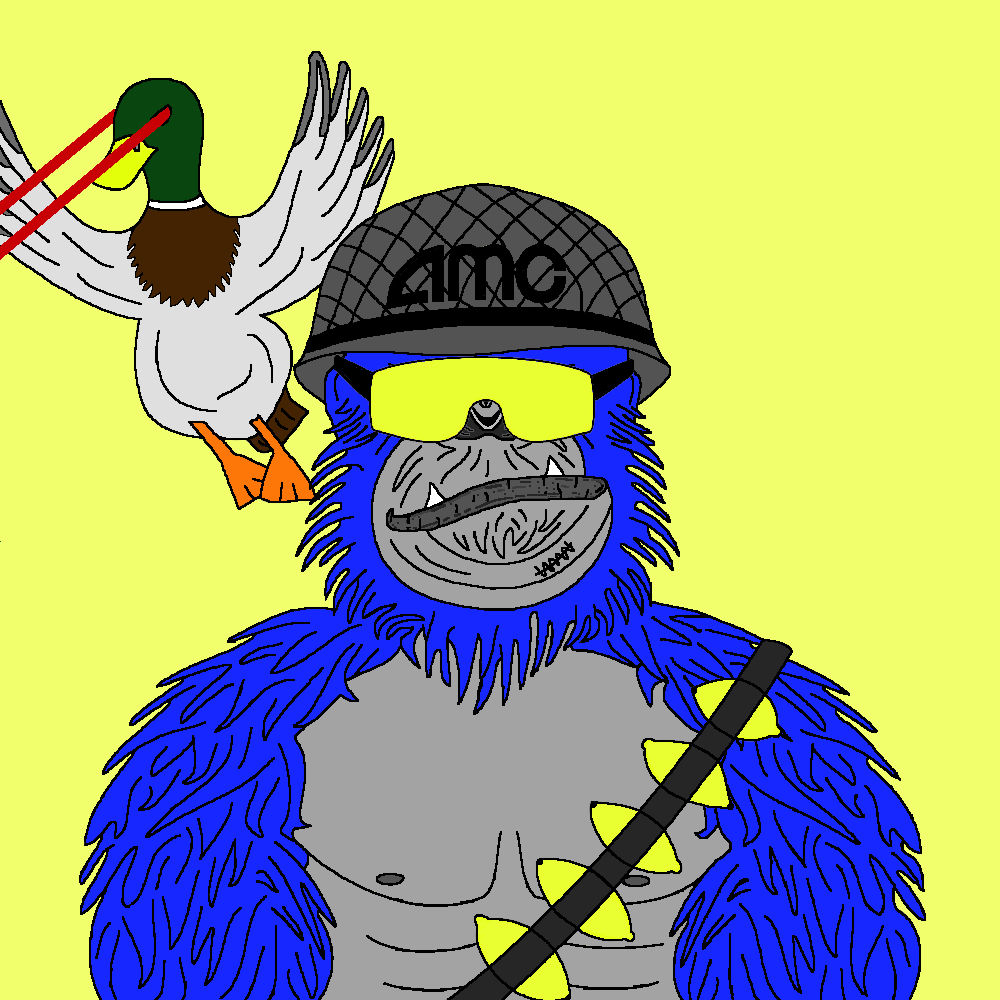

In [10]:
_, color = random_asset(backColors)
_, backImg = random_asset(backImages)
_, ape = random_asset(apes)
_, attribute = random_asset(attributes)
_, weapon = random_asset(weapons)

img = gen_ape(color, backImg, ape, attribute, weapon)
display(img)

In [11]:
# True if it exists, false if not
def check_exports(color, backImg, ape, attribute, weapon):
    checks = exported[exported.BackgroundColors == color] 
    checks = checks[checks.BackgroundImages == backImg]    
    checks = checks[checks.Apes == ape]    
    checks = checks[checks.Attributes == attribute]    
    checks = checks[checks.Weapons == weapon]
    
    if len(checks) >= 1:
        return True
    
    return False

In [12]:
weapons

Layer    Title          Name     Rarity QtAvailable
0       5  Weapons       1911Tan       None   Unlmiited
1       5  Weapons     1911Olive       None   Unlmiited
2       5  Weapons          AR15       None   Unlmiited
3       5  Weapons  BabyAMEBrown  SuperRare        1500
4       5  Weapons  BabyAMEWhite  SuperRare        1500
5       5  Weapons        Brains       None   Unlmiited
6       5  Weapons   CrayonsGray       None   Unlmiited
7       5  Weapons  CrayonsOlive       None   Unlmiited
8       5  Weapons    LemonsGray       None   Unlmiited
9       5  Weapons   LemonsOlive       None   Unlmiited
10      5  Weapons           RPG       None   Unlmiited
11      5  Weapons  SamuraiOlive       None   Unlmiited
12      5  Weapons    SamuraiTan       None   Unlmiited

In [13]:
len(exported[exported.Weapons == 'BabyAMEBrown'])

33

In [14]:
exported

BackgroundColors BackgroundImages              Apes        Attributes  \
0        FusiaBackground         FUDTower           GrayApe     OrangeGlasses   
1       YellowBackground           Tulips       GrayApeRage       BlueGlasses   
2         CyanBackground             Moon      BlackApeRage     OrangeGlasses   
3     SeaGreenBackground             Moon      BlueGreenApe     OrangeGlasses   
4         BlueBackground             Moon           BlueApe     OrangeGlasses   
5       PurpleBackground             Lamp   PeaGreenApeRage      FusiaGlasses   
6    NeonGreenBackground             Duck          GreenApe      FusiaGlasses   
7         CyanBackground             Lamp   PeaGreenApeRage              HODL   
8         BlueBackground           Tulips           BlueApe      FusiaGlasses   
9         PinkBackground         FUDTower            RedApe              YOLO   
10        CyanBackground           Rocket      FusiaApeRage             Cigar   
11        BlueBackground             Moon      BlueGreenApe             Cigar   
12        SandBackground            Titan      WhiteApeRage             Snake   
13        BlueBackground         Diamonds     OrangeApeRage  NeonGreenGlasses   
14      YellowBackground     DuckRedLaser       BlueApeRage     OrangeGlasses   
15      OrangeBackground         Diamonds     OrangeApeRage       BlueGlasses   
16        PinkBackground         FUDTower        RedApeRage      FusiaGlasses   
17      PurpleBackground         FUDTower       PeaGreenApe       BlueGlasses   
18      PurpleBackground           Tulips          BlackApe  NeonGreenGlasses   
19       FusiaBackground           Rocket  BlueGreenApeRage             Cigar   
20      OrangeBackground           Tulips           BlueApe     OrangeGlasses   
21        CyanBackground         FUDTower        RedApeRage  NeonGreenGlasses   
22   NeonGreenBackground             Moon        RedApeRage       BlueGlasses   
23      YellowBackground     DuckRedLaser      BlackApeRage     YellowGlasses   
24         RedBackground           Rocket       GrayApeRage      FusiaGlasses   
25        GrayBackground     DuckRedLaser         OrangeApe             Cigar   
26        CyanBackground            Titan      WhiteApeRage  NeonGreenGlasses   
27      YellowBackground           Rocket   PeaGreenApeRage      FusiaGlasses   
28   NeonGreenBackground            Titan      GreenApeRage             Snake   
29         RedBackground            Titan       GrayApeRage  NeonGreenGlasses   
..                   ...              ...               ...               ...   
470      FusiaBackground            Titan          WhiteApe     YellowGlasses   
471     OrangeBackground             Lamp      GreenApeRage             Snake   
472       SandBackground     DuckRedLaser           BlueApe             Snake   
473        RedBackground         Diamonds          WhiteApe             Snake   
474   SeaGreenBackground     DuckRedLaser           GrayApe     YellowGlasses   
475     OrangeBackground             Duck         PurpleApe       BlueGlasses   
476     PurpleBackground     DuckRedLaser     PurpleApeRage             Cigar   
477       GrayBackground         Diamonds         OrangeApe  NeonGreenGlasses   
478       CyanBackground     DuckRedLaser     PurpleApeRage     YellowGlasses   
479     PurpleBackground             Moon          FusiaApe       BlueGlasses   
480   SeaGreenBackground         FUDTower      GreenApeRage              HODL   
481       BlueBackground           Rocket      GreenApeRage       BlueGlasses   
482       GrayBackground            Titan     OrangeApeRage              YOLO   
483       CyanBackground             Lamp       GrayApeRage              YOLO   
484       GrayBackground     DuckRedLaser       PeaGreenApe              HODL   
485     PurpleBackground             Duck      GreenApeRage       BlueGlasses   
486     PurpleBackground         FUDTower           BlueApe      FusiaGlasses   
487       BlueBackground             Du

In [15]:
exportedCt = 0
while len(exported) != 69000:
    exportedCt = len(exported)
    if exportedCt % 50 == 0:
        clear_output()
        print('{}/69000 - {}%'.format(exportedCt, round(exportedCt/69000, 4)*100))
        if exportedCt > 50: exported.to_csv('output/_metadata.csv', index=False)
            
#     if not os.path.exists('output/{}.png'.format(len(exported)+1)): # if the file doesn't yet exist
    backColors, color = random_asset(backColors)
    backImages, backImg = random_asset(backImages)
    apes, ape = random_asset(apes)
    attributes, attribute = random_asset(attributes)
    weapons, weapon = random_asset(weapons)

    # Make sure this combination doesn't currently exist
    if not check_exports(color, backImg, ape, attribute, weapon):
        img = gen_ape(color, backImg, ape, attribute, weapon) # Generate image
        exported.loc[exportedCt] = [color, backImg, ape, attribute, weapon]
        img.save('output/images/{}.png'.format(len(exported)-1))
    else:
        print("dupe-", end="")


68950/69000 - 99.92999999999999%
dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-dupe-du

In [21]:
exported.to_csv('output/_metadata.csv', index=False)

## Verify proper generation
- Let's check that 
    - Only 69,000 were generated
    - Limits were adhered to
    - No duplicates

#### Quantity

In [22]:
len(os.listdir('output'))-1

69000

#### Limits

In [23]:
for i, layer in layers.iterrows():
    if layer.QtAvailable != 'Unlmiited':
        if len(exported[exported[layer.Title] == layer.Name]) > int(layer.QtAvailable):
            print("Busted limit on {} with {}/{}".format(layer.Name, len(exported[exported[layer.Title] == layer.Name]), int(layer.QtAvailable)))

Busted limit on Lamp with 4001/4000
Busted limit on BlackApeRage with 1501/1500
Busted limit on BlueApeRage with 1501/1500
Busted limit on BlueGreenApeRage with 1501/1500
Busted limit on FusiaApeRage with 1501/1500
Busted limit on GrayApeRage with 1501/1500
Busted limit on GreenApeRage with 1501/1500
Busted limit on OrangeApeRage with 1501/1500
Busted limit on PurpleApeRage with 1501/1500
Busted limit on RedApeRage with 1501/1500
Busted limit on WhiteApeRage with 1501/1500
Busted limit on BlueGlasses with 4001/4000
Busted limit on FusiaGlasses with 4001/4000
Busted limit on NeonGreenGlasses with 4001/4000
Busted limit on YellowGlasses with 4001/4000
Busted limit on BabyAMEBrown with 1501/1500
Busted limit on BabyAMEWhite with 1501/1500


In [19]:
len(exported[exported['BackgroundImages'] == 'Lamp'])

4001

#### Duplicates

In [24]:
len(exported.drop_duplicates()) - len(exported)

0

No duplicates

### Change some attribute values

A Few of the attrubutes need to change to reflect asset changes

- CrayonsOlive should read CrayonsCharcoal
- LemonsOlive should read LemonsCharcoal
- SamuraiOlive should read SamuraiCharcoal
- SamuraiTan should read SamuraiGray
- 1911Olive should read 1911Charcoal
- 1911Tan should read 1911Gray

In [23]:
meta = pd.read_csv('output/_metadata.csv')

In [27]:
replacements = {
    "CrayonsOlive":"CrayonsCharcoal",
    "LemonsOlive":"LemonsCharcoal",
    "SamuraiOlive":"SamuraiCharcoal",
    "SamuraiTan":"SamuraiGray",
    "1911Olive":"1911Charcoal",
    "1911Tan":"1911Gray",
}

for i, weapon in enumerate(meta.Weapons):
    if weapon in replacements.keys():
        meta.Weapons[i] = replacements[weapon]

In [30]:
replacements.values()

dict_values(['CrayonsCharcoal', 'LemonsCharcoal', 'SamuraiCharcoal', 'SamuraiGray', '1911Charcoal', '1911Gray'])

In [35]:
for w in replacements.keys():
    print(w in meta.Weapons.tolist())

False
False
False
False
False
False


## Create JSON files for IPFS from metadata

In [36]:
import json

In [15]:
# pinata.cloud api keys specific to this project
key = "5238dd360d7a7759c658"
secret = "08eb807ecdc4696641f51a784cce392f4b293693baf6f1402650138bfee81d4c"
jwt = "eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJ1c2VySW5mb3JtYXRpb24iOnsiaWQiOiIwMWNkNjNmNC0zYWI4LTRmYTQtYmQ0YS1hZTVjYTAzZWRlYmMiLCJlbWFpbCI6ImJib3ludG9uOTdAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsInBpbl9wb2xpY3kiOnsicmVnaW9ucyI6W3siaWQiOiJOWUMxIiwiZGVzaXJlZFJlcGxpY2F0aW9uQ291bnQiOjF9XSwidmVyc2lvbiI6MX0sIm1mYV9lbmFibGVkIjpmYWxzZX0sImF1dGhlbnRpY2F0aW9uVHlwZSI6InNjb3BlZEtleSIsInNjb3BlZEtleUtleSI6IjUyMzhkZDM2MGQ3YTc3NTljNjU4Iiwic2NvcGVkS2V5U2VjcmV0IjoiMDhlYjgwN2VjZGM0Njk2NjQxZjUxYTc4NGNjZTM5MmY0YjI5MzY5M2JhZjZmMTQwMjY1MDEzOGJmZWU4MWQ0YyIsImlhdCI6MTYzMzQ1NDkwNH0.iAa6-KutpGJhN10en1GokWMKcchIlU4RbRG9W2AhbKw"

In [4]:
meta = pd.read_csv('output/_metadata.csv')

In [37]:
meta.iloc[0]

BackgroundColors    FusiaBackground
BackgroundImages           FUDTower
Apes                        GrayApe
Attributes            OrangeGlasses
Weapons             SamuraiCharcoal
Name: 0, dtype: object

In [38]:
cid = "QmXd5xkg3Lt74WegKx3REnvHAvhUhXHoxStDiDnLGjVvi9"

for i, file in meta.iterrows():
    if i % 200 == 0:
        clear_output()
        print('{}/69000 - {}%'.format(i, round(i/69000, 4)*100))
    
    data = {}
    data['image'] = 'ipfs://{}/{}.png'.format(cid, i)
    data['name'] = "AMC Ape Army #{}".format(i+1)
    data['description'] = "The AMC Ape Army is a collection of 69,000 unique AMC Ape NFTs, which live on the Polygon blockchain. The Polygon Network is a protocol and framework for building and connecting Ethereum-compatible blockchain networks. Each AMC Ape doubles as your membership card that grants access to the members-only party planning bunker where the community is prepping for our MOASS post-squeeze celebration. Visit AMCApeArmyNFT.com for more information."
    data['attributes'] = [
        {
            "trait_type": "Background Color",
            "value": file.BackgroundColors 
        },
        {
          "trait_type": "Background Image",
          "value": file.BackgroundImages 
        },
        {
          "trait_type": "Ape",
          "value": file.Apes
        },
        {
          "trait_type": "Attribute",
          "value": file.Attributes  
        },
        {
          "trait_type": "Weapon",
          "value": file.Weapons
        }
    ]
    
    
    with open('output/json/{}.json'.format(i), 'w') as outfile:
        json.dump(data, outfile)

68800/69000 - 99.71%
